In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_table('melon.txt',sep=' ')
data['好瓜'] = data['好瓜'].apply(lambda x:2*x-1)
X = data[['密度','含糖率']].values
Y = data['好瓜'].values

In [3]:
from sklearn.svm import SVC
clf_linear = SVC(C=5,kernel='linear')
clf_linear.fit(X,Y)
clf_rbf = SVC(C=5,kernel='rbf')
clf_rbf.fit(X,Y)

SVC(C=5)

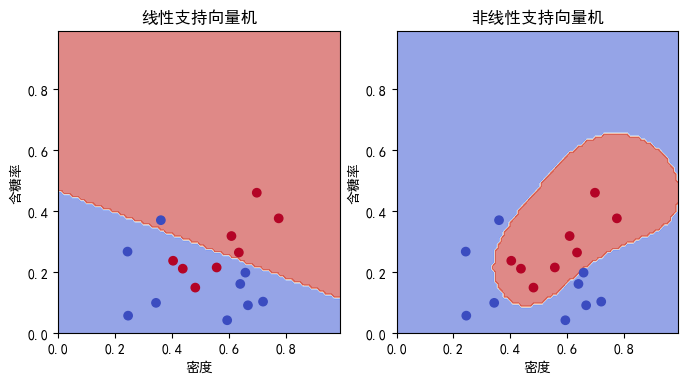

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(8,4),dpi=100)
title = ['线性支持向量机','非线性支持向量机']
for i,clf in enumerate([clf_linear,clf_rbf]):
    plt.subplot(1,2,i+1)
    xx, yy = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('密度')
    plt.ylabel('含糖率')
    plt.title(title[i])